In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, ElasticNet
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
import pandas.testing as tm
from pprint import pprint
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [3]:
california


{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

In [4]:
#creating a dataframe of the data
X = california.data
y = california.target
df_x = pd.DataFrame(X)
df_y=pd.DataFrame(y)
df_x.columns = california.feature_names 
df_x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
df_x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [6]:
df_y.describe()

,0
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


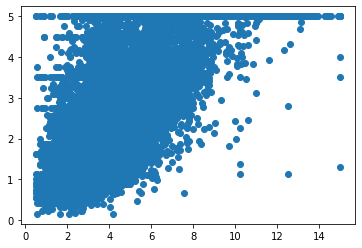

In [7]:
plt.scatter(df_x['MedInc'], df_y)
plt.show()

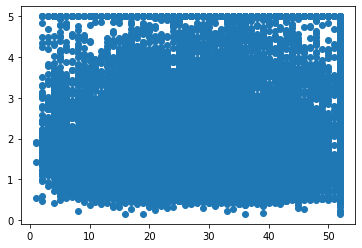

In [8]:
plt.scatter(df_x['HouseAge'], df_y)
plt.show()

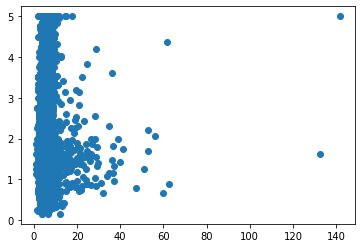

In [9]:
plt.scatter(df_x['AveRooms'], df_y)
plt.show()

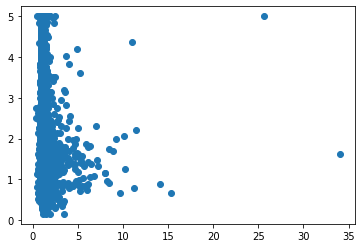

In [10]:
plt.scatter(df_x['AveBedrms'], df_y)
plt.show()	

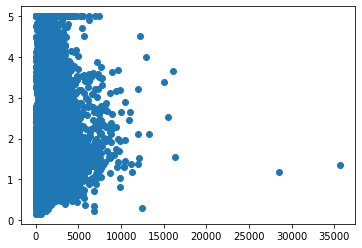

In [11]:
plt.scatter(df_x['Population'], df_y)
plt.show()	

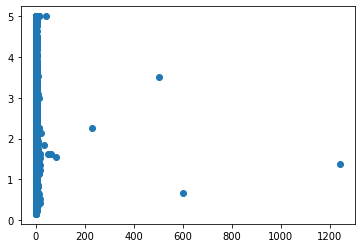

In [12]:
plt.scatter(df_x['AveOccup'], df_y)
plt.show()	

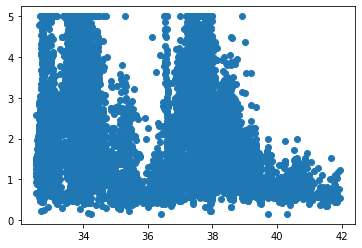

In [13]:
plt.scatter(df_x['Latitude'], df_y)
plt.show()	

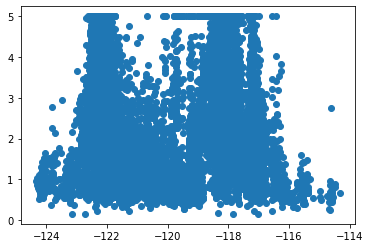

In [14]:
plt.scatter(df_x['Longitude'], df_y)
plt.show()	

In [15]:
#checking for null values in features
missing_values = df_x.isnull().sum()
target_missing_values = df_y.isnull().sum()
print(missing_values)
print(target_missing_values)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
0    0
dtype: int64


In [16]:
df_x.shape

(20640, 8)

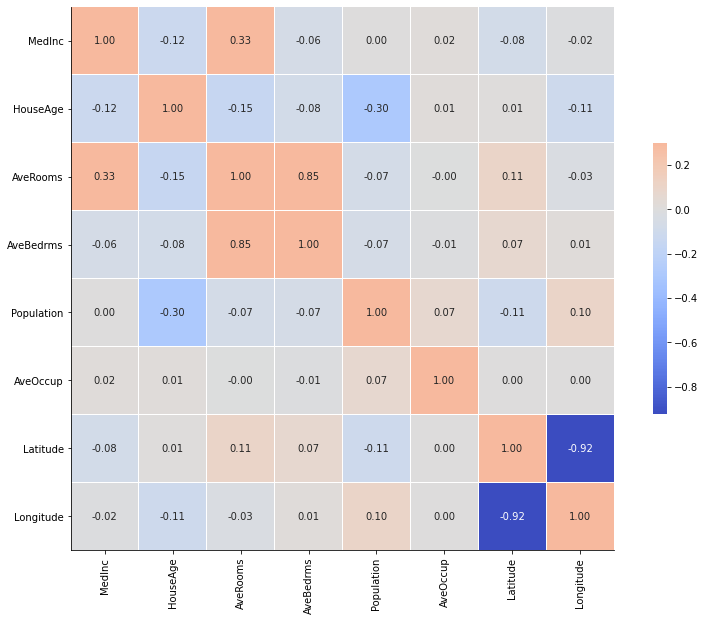

In [17]:
corr = df_x.corr()
g = sns.heatmap(corr,  vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
plt.show()

In [18]:
df_x.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [19]:
#df_y.dtypes
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(df_y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
numerics = ['float64','float64','float64','float64','float64','float64','float64','float64']
numerical_vars = list(df_x.select_dtypes(include=numerics).columns)
data = df_x[numerical_vars]
data.shape

(20640, 8)

Since all the features have numeric data we take all the features

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_x,encoded,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

This is because in all feature selection procedures, it is a good practice to select the features by examining only the training set. This is to avoid overfitting.

In [22]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [25]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

True is for the features that lasso thought is important (non-zero features) while False is for the features whose weights were shrinked to zero and are not important according to Lasso.

In [26]:
X_copy = X.copy()
X_copy

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [27]:
transformed_X = PowerTransformer().fit_transform(X_copy)
transformed_y = PowerTransformer().fit_transform(df_y)
#transformed_y

In [28]:
pca_with_varia = PCA(0.9)
pca_with_varia.fit_transform(transformed_X)
pca_with_varia.n_components_

6

In [29]:
pca = PCA(n_components = 2)
pc_s = pca.fit_transform(transformed_X)
pca_data = pd.DataFrame(pc_s, columns=['PC 1', 'PC 2'])
pca_data['Target'] = transformed_y
pca_data.head()

,PC 1,PC 2,Target
0,-1.427322,1.860308,1.715878
1,-1.799863,-0.066712,1.281389
2,-1.452153,1.838765,1.247506
3,-0.327158,1.822192,1.188835
4,-0.069245,2.278266,1.193798


In [30]:
pca_data

,PC 1,PC 2,Target
0,-1.427322,1.860308,1.715878
1,-1.799863,-0.066712,1.281389
2,-1.452153,1.838765,1.247506
3,-0.327158,1.822192,1.188835
4,-0.069245,2.278266,1.193798
...,...,...,...
20635,0.666173,1.380161,-1.414289
20636,-0.765451,1.724314,-1.433165
20637,0.231889,1.203516,-1.160803
20638,0.024276,1.764455,-1.293200


In [31]:
#creating new data set array
final_dataset_array=pca_data.to_numpy()
#final_dataset_array

In [32]:
pca.explained_variance_ratio_

array([0.24489874, 0.20572081])

In [33]:
min_val=np.min(final_dataset_array,axis=0)
max_val=np.max(final_dataset_array,axis=0)
X,y=np.meshgrid(np.linspace(min_val[0],max_val[0],20),np.linspace(min_val[1],max_val[1],20))

In [34]:
regressor=LassoCV()
training_final=np.c_[final_dataset_array[:,0],final_dataset_array[:,1]]
regressor.fit(training_final,final_dataset_array[:,2])
weight_1=regressor.coef_[0]
weight_2=regressor.coef_[1]
b=regressor.intercept_
#the general linear regression equation
Z=weight_1*X + weight_2*y + b

Text(0.5, 0.92, 'Plane/Line of best fit')

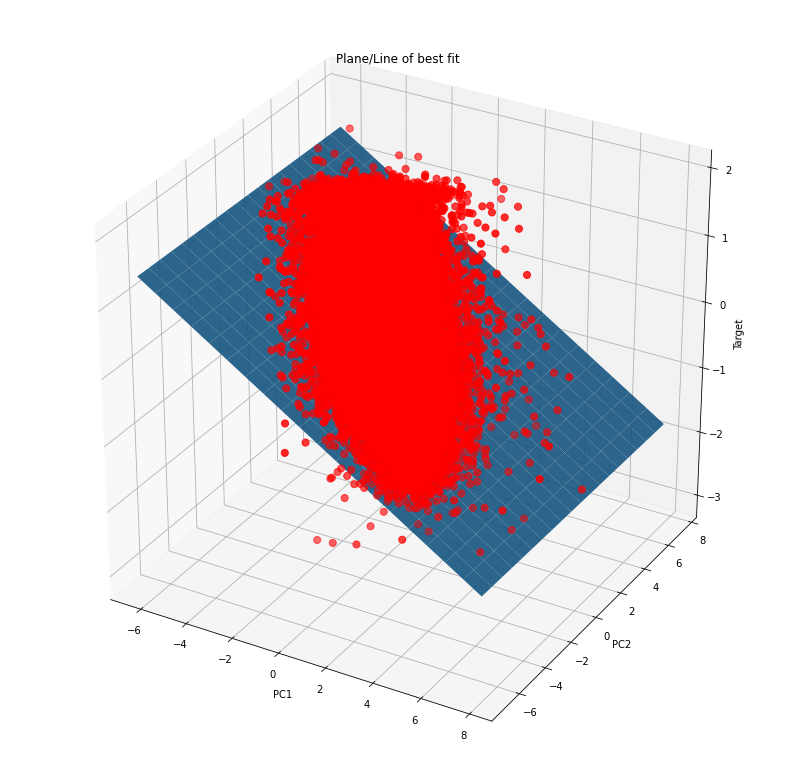

In [35]:
#plotting the data
figure1=plt.figure(figsize=(14,14))
ax=figure1.gca(projection='3d')
ax.plot_surface(X, y, Z, rstride=1, cstride=1, alpha=0.9)
ax.scatter(final_dataset_array[:,0],final_dataset_array[:,1],final_dataset_array[:,2], c='r', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('Target')
ax.set_title('Plane/Line of best fit')

**Using Seaborn Library do draw a pair plot**

---

We examine the features by plotting attribute to target relationships to show data distribution and see which features are relevant.
Seaborn Library combines powerful aspects of Matplotlib and Pandas DataFrames.

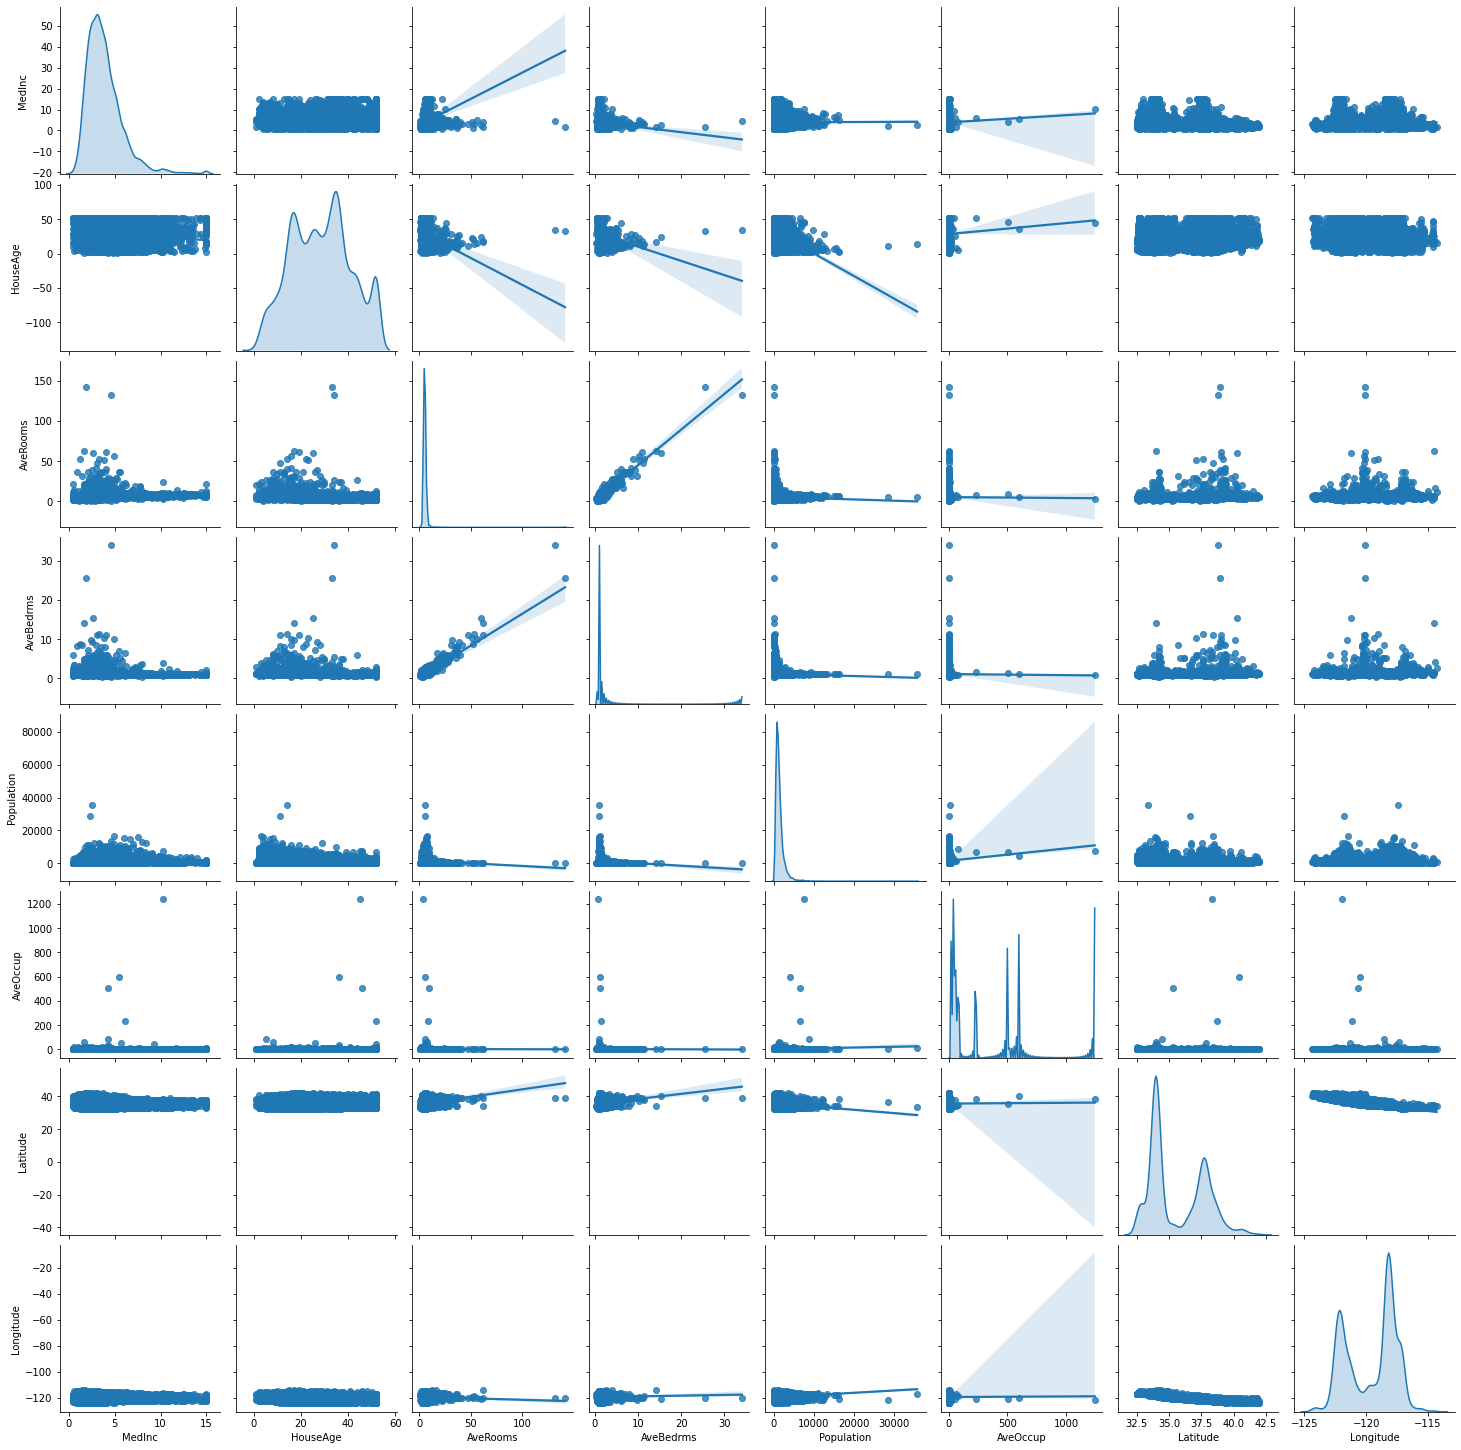

In [36]:
sns.pairplot(df_x,kind='reg',diag_kind='kde')

**Model Selection**

---

Building a regression model to predict house prices. We aim at choosing the most suitable regression model for the most accurate predictions.

First we compare the different regression models by obtaining the models' train and test scores and compare the accuracy.

In [ ]:
# define function to calculate train and test scores
def calc_scores(mod, X_train, X_test, y_train, y_test):
    models[mod].fit(X_train, y_train)
    train_res = models[mod].score(X_train, y_train)
    test_res = models[mod].score(X_test, y_test)
    return train_res, test_res

We compute train and test scores using the different regression models, store the scores in a Pandas dataframe and train the models.

In [ ]:
train_scores = []
test_scores = []
models = {
          'LassoCV':linear_model.LassoCV(),
          'Lasso':linear_model.Lasso(),
          'LinearRegression':linear_model.LinearRegression(),
          'ElasticNet':linear_model.ElasticNet(),
          'Ridge':linear_model.Ridge()
          }
names =['LassoCV','Lasso','LinearRegression','ElasticNet','Ridge']

scores_df = pd.DataFrame(columns=['Train score', 'Test score'], index=names)
# define function that fits the model and gets the train and test scores
def mod_score(X_train, X_test, y_train, y_test):
        for mod in models:

            train_res, test_res = calc_scores(mod, X_train, X_test, y_train, y_test)
            train_scores.append(train_res)
            test_scores.append(test_res)
        scores_df['Train score'] = train_scores
        scores_df['Test score'] = test_scores
       
        train_scores.clear()
        test_scores.clear()
        return scores_df

mod_score(X_train, X_test, y_train, y_test)

,Train score,Test score
LassoCV,0.602304,0.586920
Lasso,0.613146,0.598736
LinearRegression,0.613193,0.598766
ElasticNet,0.560566,0.545780
Ridge,0.613193,0.598765


Finally, we selct the model based on the scores that do not overfit or underfit the data so as to avoid bias when making the prediction. We chose the Ridge regression model because of the high adjusted r-squared value that the model possesses over the dataframe.